## 1. Import Library and Load Data

In [1]:
#%tensorflow_version 2.x  #if execute in Google Colab enable this line

In [2]:
import pandas as pd
import numpy as np
import math
import time
import scipy.stats as stats

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes = True)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Activation
from tensorflow.keras import optimizers, regularizers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import SGD, Adam
from sklearn import preprocessing

from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
from sklearn.metrics import recall_score, f1_score, precision_recall_curve, auc
from sklearn.preprocessing import LabelEncoder

In [3]:
#Initialize the random number
import random
seed = 0
np.random.seed(seed)

#ignore worning
import warnings as wn
wn.filterwarnings("ignore")

### Load the Data

In [5]:
sigdata = pd.read_csv('./Signal.csv')

### Check the shape of data:

In [6]:
print("Shape of data:", sigdata.shape)
sigdata.head(20)

Shape of data: (1599, 12)


,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


- **There are 1599 rows and 12 columns**

In [7]:
### check the datatypes of data with addition information using info
sigdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Parameter 1      1599 non-null   float64
 1   Parameter 2      1599 non-null   float64
 2   Parameter 3      1599 non-null   float64
 3   Parameter 4      1599 non-null   float64
 4   Parameter 5      1599 non-null   float64
 5   Parameter 6      1599 non-null   float64
 6   Parameter 7      1599 non-null   float64
 7   Parameter 8      1599 non-null   float64
 8   Parameter 9      1599 non-null   float64
 9   Parameter 10     1599 non-null   float64
 10  Parameter 11     1599 non-null   float64
 11  Signal_Strength  1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


- **All the parameters are floating point and the signal strength is integer type.**

### Missing/incorrect value treatment

In [8]:
#check if any column have missing value
#Fucniton to check the missing value
def missing_val(data_frame):
    nullchecksr = data_frame.isnull().sum()
    
    if ((nullchecksr.values > 0).any()):
        missing_val_df = nullchecksr[nullchecksr.values > 0].to_frame('missing_val_cnt')
        missing_val_df.insert(0, 'column_name', missing_val_df.index)
        missing_val_df.insert(2, 'percen_of_missing_val', (missing_val_df['missing_val_cnt']/1567) * 100)
       
        print('Missing values list:\n')
        print(missing_val_df.sort_values('missing_val_cnt',ascending=False))
        missing_val_df.to_csv("export.csv")
        return missing_val_df
    else:
        print('There is no missing value in dataset.')

In [9]:
#cehck missing value
missing_val_df =  missing_val(sigdata)

There is no missing value in dataset.


## 2. Data analysis & visualisation:

### Point summary of numerical attributes

In [10]:
#check the descriptive statistics
sigdata.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Parameter 1,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
Parameter 2,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
Parameter 3,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
Parameter 4,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
Parameter 5,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
Parameter 6,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
Parameter 7,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
Parameter 8,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
Parameter 9,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
Parameter 10,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


- **Parameter3 range between 0 and 1.**
- **Parameter 1, Parameter 4, Parameter 6, Parameter 7 is highly right skewed.**
- **Signal_Strength range between 3 to 8.**

In [11]:
# sigdata['Parameter 2'] = sigdata['Parameter 2'] + sigdata['Parameter 3']
# sigdata['Parameter 5'] = sigdata['Parameter 5'] + sigdata['Parameter 8']

In [12]:
#define funciton for histplot
def hist_plot(df, col_name, index):

    #figsize
    plt.figure(figsize=(25,6))
    
    #counter
    sub_ln = len(index)
    
    #loop
    for idx, col in zip(index, col_name):
        plt.subplot(1, sub_ln, idx)
        sns.histplot(data = df, x=col, kde= True, edgecolor = 'black');

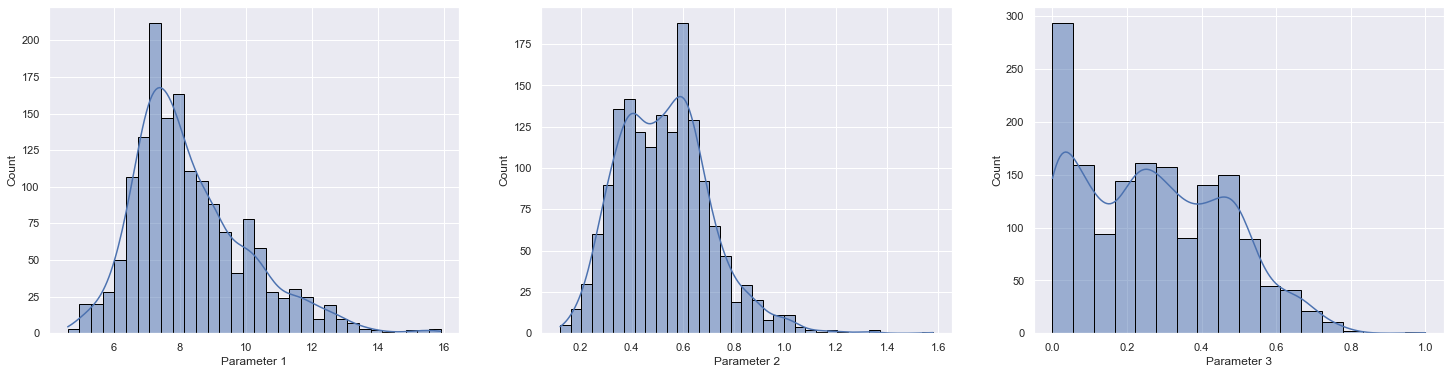

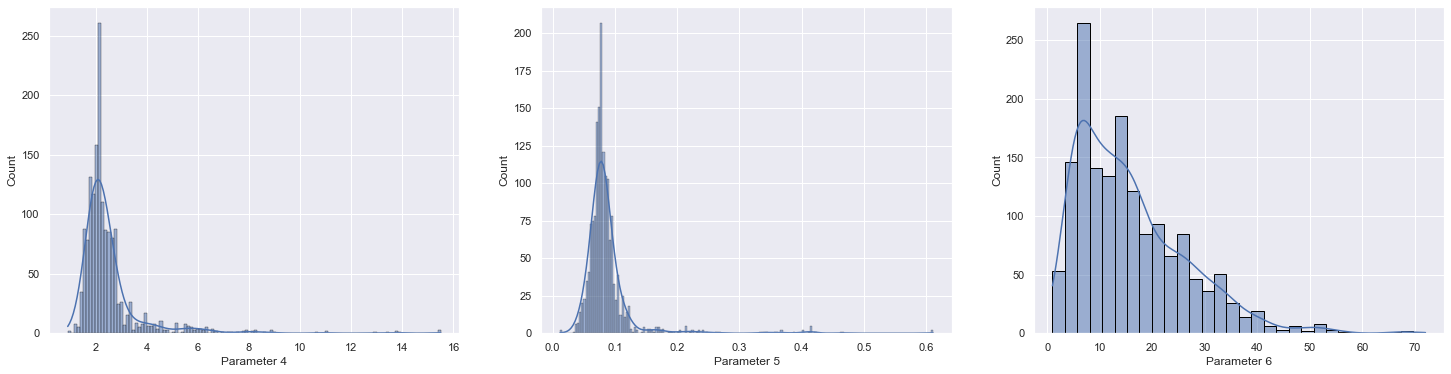

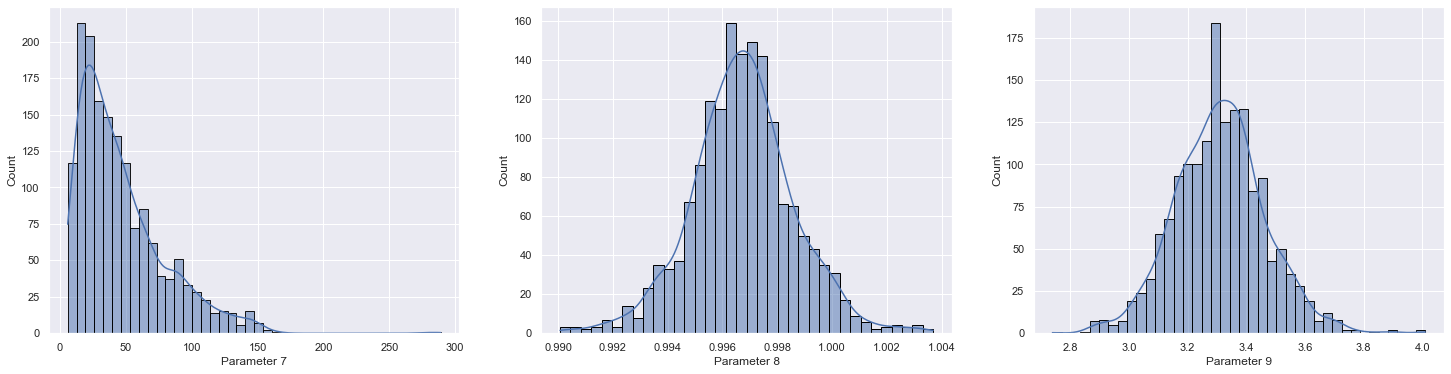

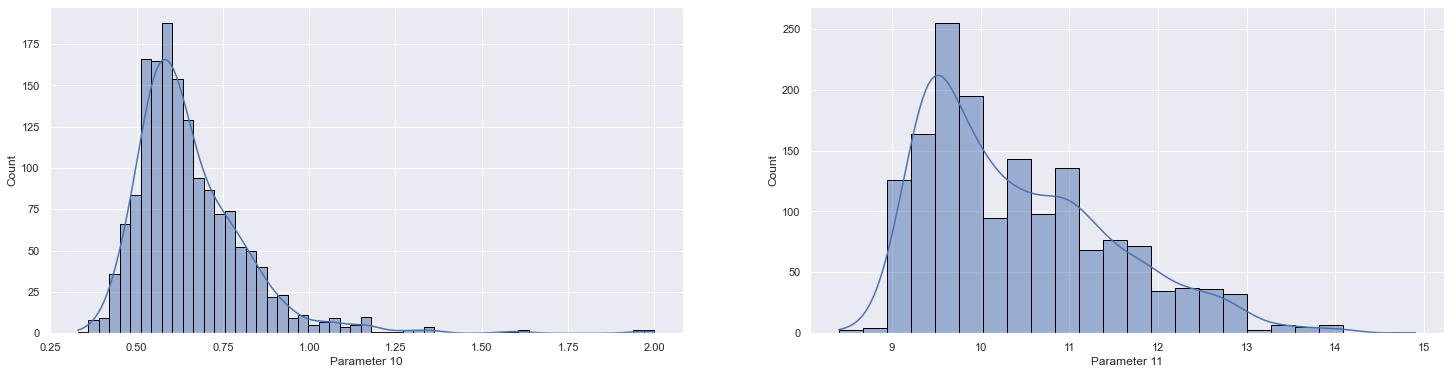

In [13]:
hist_plot(sigdata,  ['Parameter 1', 'Parameter 2', 'Parameter 3'], [1, 2, 3])
hist_plot(sigdata,  ['Parameter 4', 'Parameter 5', 'Parameter 6'], [1, 2, 3])
hist_plot(sigdata,  ['Parameter 7', 'Parameter 8', 'Parameter 9'], [1, 2, 3])
hist_plot(sigdata,  ['Parameter 10', 'Parameter 11'], [1, 2])

- **As we can see most of parameter are right skewed ans some are parameter 4, 5, 7, 10 have very high skewed data.**
- **parameter 3 range between 0 to 1.**

<AxesSubplot:xlabel='Signal_Strength', ylabel='count'>

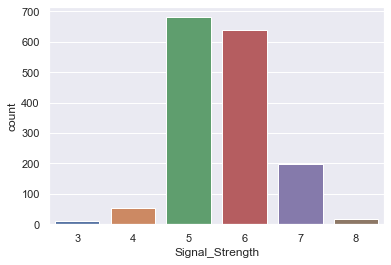

In [14]:
## Distribution of Signal_Strength
sns.countplot(sigdata['Signal_Strength'])  

- **High no of signal strengh is 5 followed by 6, 7, 4, 8 and 3.**

### Box plot to check each variable details outlier check

In [15]:
#Box plot to check if any outliers in data
#define one fucniton to do box plot
def box_plot(data, columnlist):
    dataset = data
    column_list = columnlist
    length_columnlist = len(columnlist)
    
    #plot colors
    colors_list = ['lightgreen', 'lightblue', 'pink', 'red', 'green']
    
    if(length_columnlist > 5):
        length_columnlist = 5
    
    #plot the graph
    plt.figure(figsize=(25, 15))
    for i in range(length_columnlist):
        plt.subplot(4, 5, i+1)
        sns.boxplot(data= dataset, x=column_list[i], color = colors_list[i] )

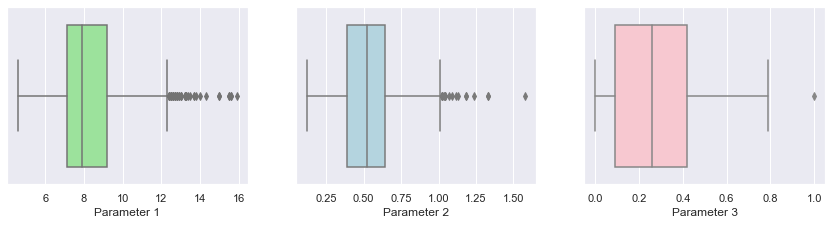

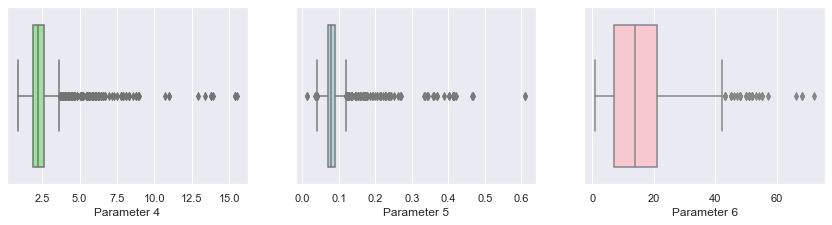

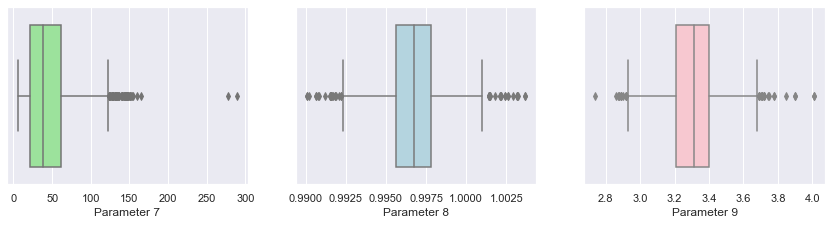

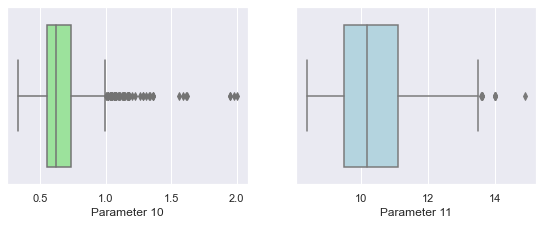

In [16]:
box_plot(sigdata, ['Parameter 1', 'Parameter 2', 'Parameter 3'])
box_plot(sigdata, ['Parameter 4', 'Parameter 5', 'Parameter 6'])
box_plot(sigdata, ['Parameter 7', 'Parameter 8', 'Parameter 9'])
box_plot(sigdata, ['Parameter 10', 'Parameter 11'])

- **Except Parameter 3 and 11 most of parameter have high no.of out liers.**

In [17]:
# define a function for identifying the outliers and remove the outliers
def find_and_treat_outliers(data, col_name):
    
    #loop the column name
    for attribute in col_name:
        # sort the attribute
        data.sort_values(by=attribute)

        # quartile 25: indicates first quartile
        quartiles_25 = np.percentile(data[attribute], [25]) 

        # quartile 25: indicates first quartile
        min_val = min(data[attribute]) 
        max_val = min(data[attribute]) 

        # quartile 75: indicates third quartile
        quartiles_75 = np.percentile(data[attribute], [75])

        # inter quartile range
        IQR =  quartiles_75 - quartiles_25

        # find lower bound q1 - (1.5 *IQR)
        lower_fence = quartiles_25 - (1.5 * IQR)

        # find upper bound  q3 - (1.5 *IQR)
        upper_fence = quartiles_75  + (1.5 * IQR )

        print ('Presense Of Outliers In ' + attribute)
        print ('---------------------------')

        print (attribute + '     : quartile_75 : ', quartiles_75, 
               '\n'+ attribute+ ': quartile_25 : ', quartiles_25, 
               '\n'+ attribute+ ': IQR : ', IQR, 
               '\n'+ attribute+ ': lower_bound : ', lower_fence, 
               '\n'+ attribute+ ': upper_bound : ', upper_fence)

        print (attribute + ': Any data lower than : ', np.around(lower_fence, decimals = 2) , 
               ' and upper than :' , np.around(upper_fence, decimals = 2) , ' is considered as outlier')

        #print(data[data[attribute].values > upper_fence][attribute]  )

        #since very few out lieres are there we can use Quantile-based Flooring and Capping techinque scale outliers
        quartiles_10 = np.percentile(data[attribute], [10])
        quartiles_90 = np.percentile(data[attribute], [90])
        
        data[attribute] = np.where(data[attribute].values < lower_fence, lower_fence, data[attribute])
        
        if(quartiles_90 > upper_fence):
            data[attribute] = np.where(data[attribute].values > upper_fence, quartiles_90, data[attribute])
        else:
            data[attribute] = np.where(data[attribute].values > upper_fence, upper_fence, data[attribute])

        print(data[data[attribute].values > upper_fence][attribute]  )

- **Above function will find the outliers ans using quantile based chopping technique handle the outliers.**

In [18]:
find_and_treat_outliers(sigdata, ['Parameter 1', 'Parameter 2', 'Parameter 3'])
find_and_treat_outliers(sigdata, ['Parameter 4', 'Parameter 5', 'Parameter 6'])
find_and_treat_outliers(sigdata, ['Parameter 7', 'Parameter 8', 'Parameter 9'])
find_and_treat_outliers(sigdata, ['Parameter 10', 'Parameter 11'])

Presense Of Outliers In Parameter 1
---------------------------
Parameter 1     : quartile_75 :  [9.2] 
Parameter 1: quartile_25 :  [7.1] 
Parameter 1: IQR :  [2.1] 
Parameter 1: lower_bound :  [3.95] 
Parameter 1: upper_bound :  [12.35]
Parameter 1: Any data lower than :  [3.95]  and upper than : [12.35]  is considered as outlier
Series([], Name: Parameter 1, dtype: float64)
Presense Of Outliers In Parameter 2
---------------------------
Parameter 2     : quartile_75 :  [0.64] 
Parameter 2: quartile_25 :  [0.39] 
Parameter 2: IQR :  [0.25] 
Parameter 2: lower_bound :  [0.015] 
Parameter 2: upper_bound :  [1.015]
Parameter 2: Any data lower than :  [0.02]  and upper than : [1.02]  is considered as outlier
Series([], Name: Parameter 2, dtype: float64)
Presense Of Outliers In Parameter 3
---------------------------
Parameter 3     : quartile_75 :  [0.42] 
Parameter 3: quartile_25 :  [0.09] 
Parameter 3: IQR :  [0.33] 
Parameter 3: lower_bound :  [-0.405] 
Parameter 3: upper_bound :  [0.9

<AxesSubplot:>

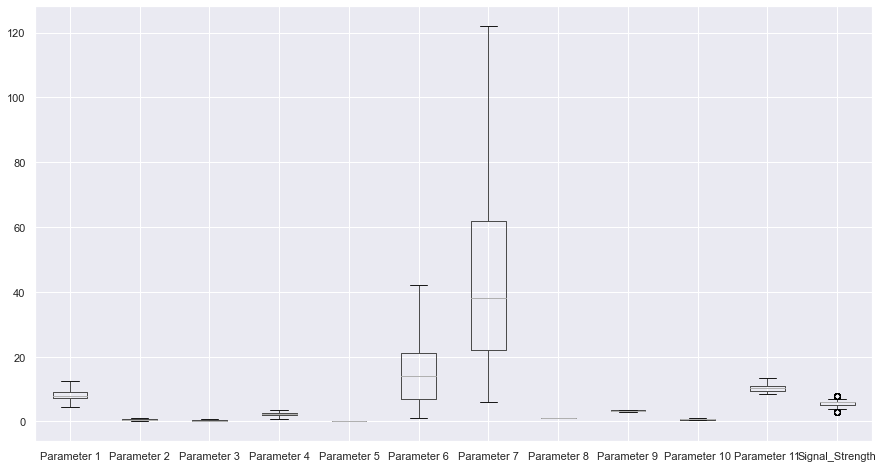

In [19]:
plt.figure(figsize=(15, 8))
sigdata.boxplot()

- **Most of data is normlized after outlier removal**

## Bivariate and Mulitvariate Analysis

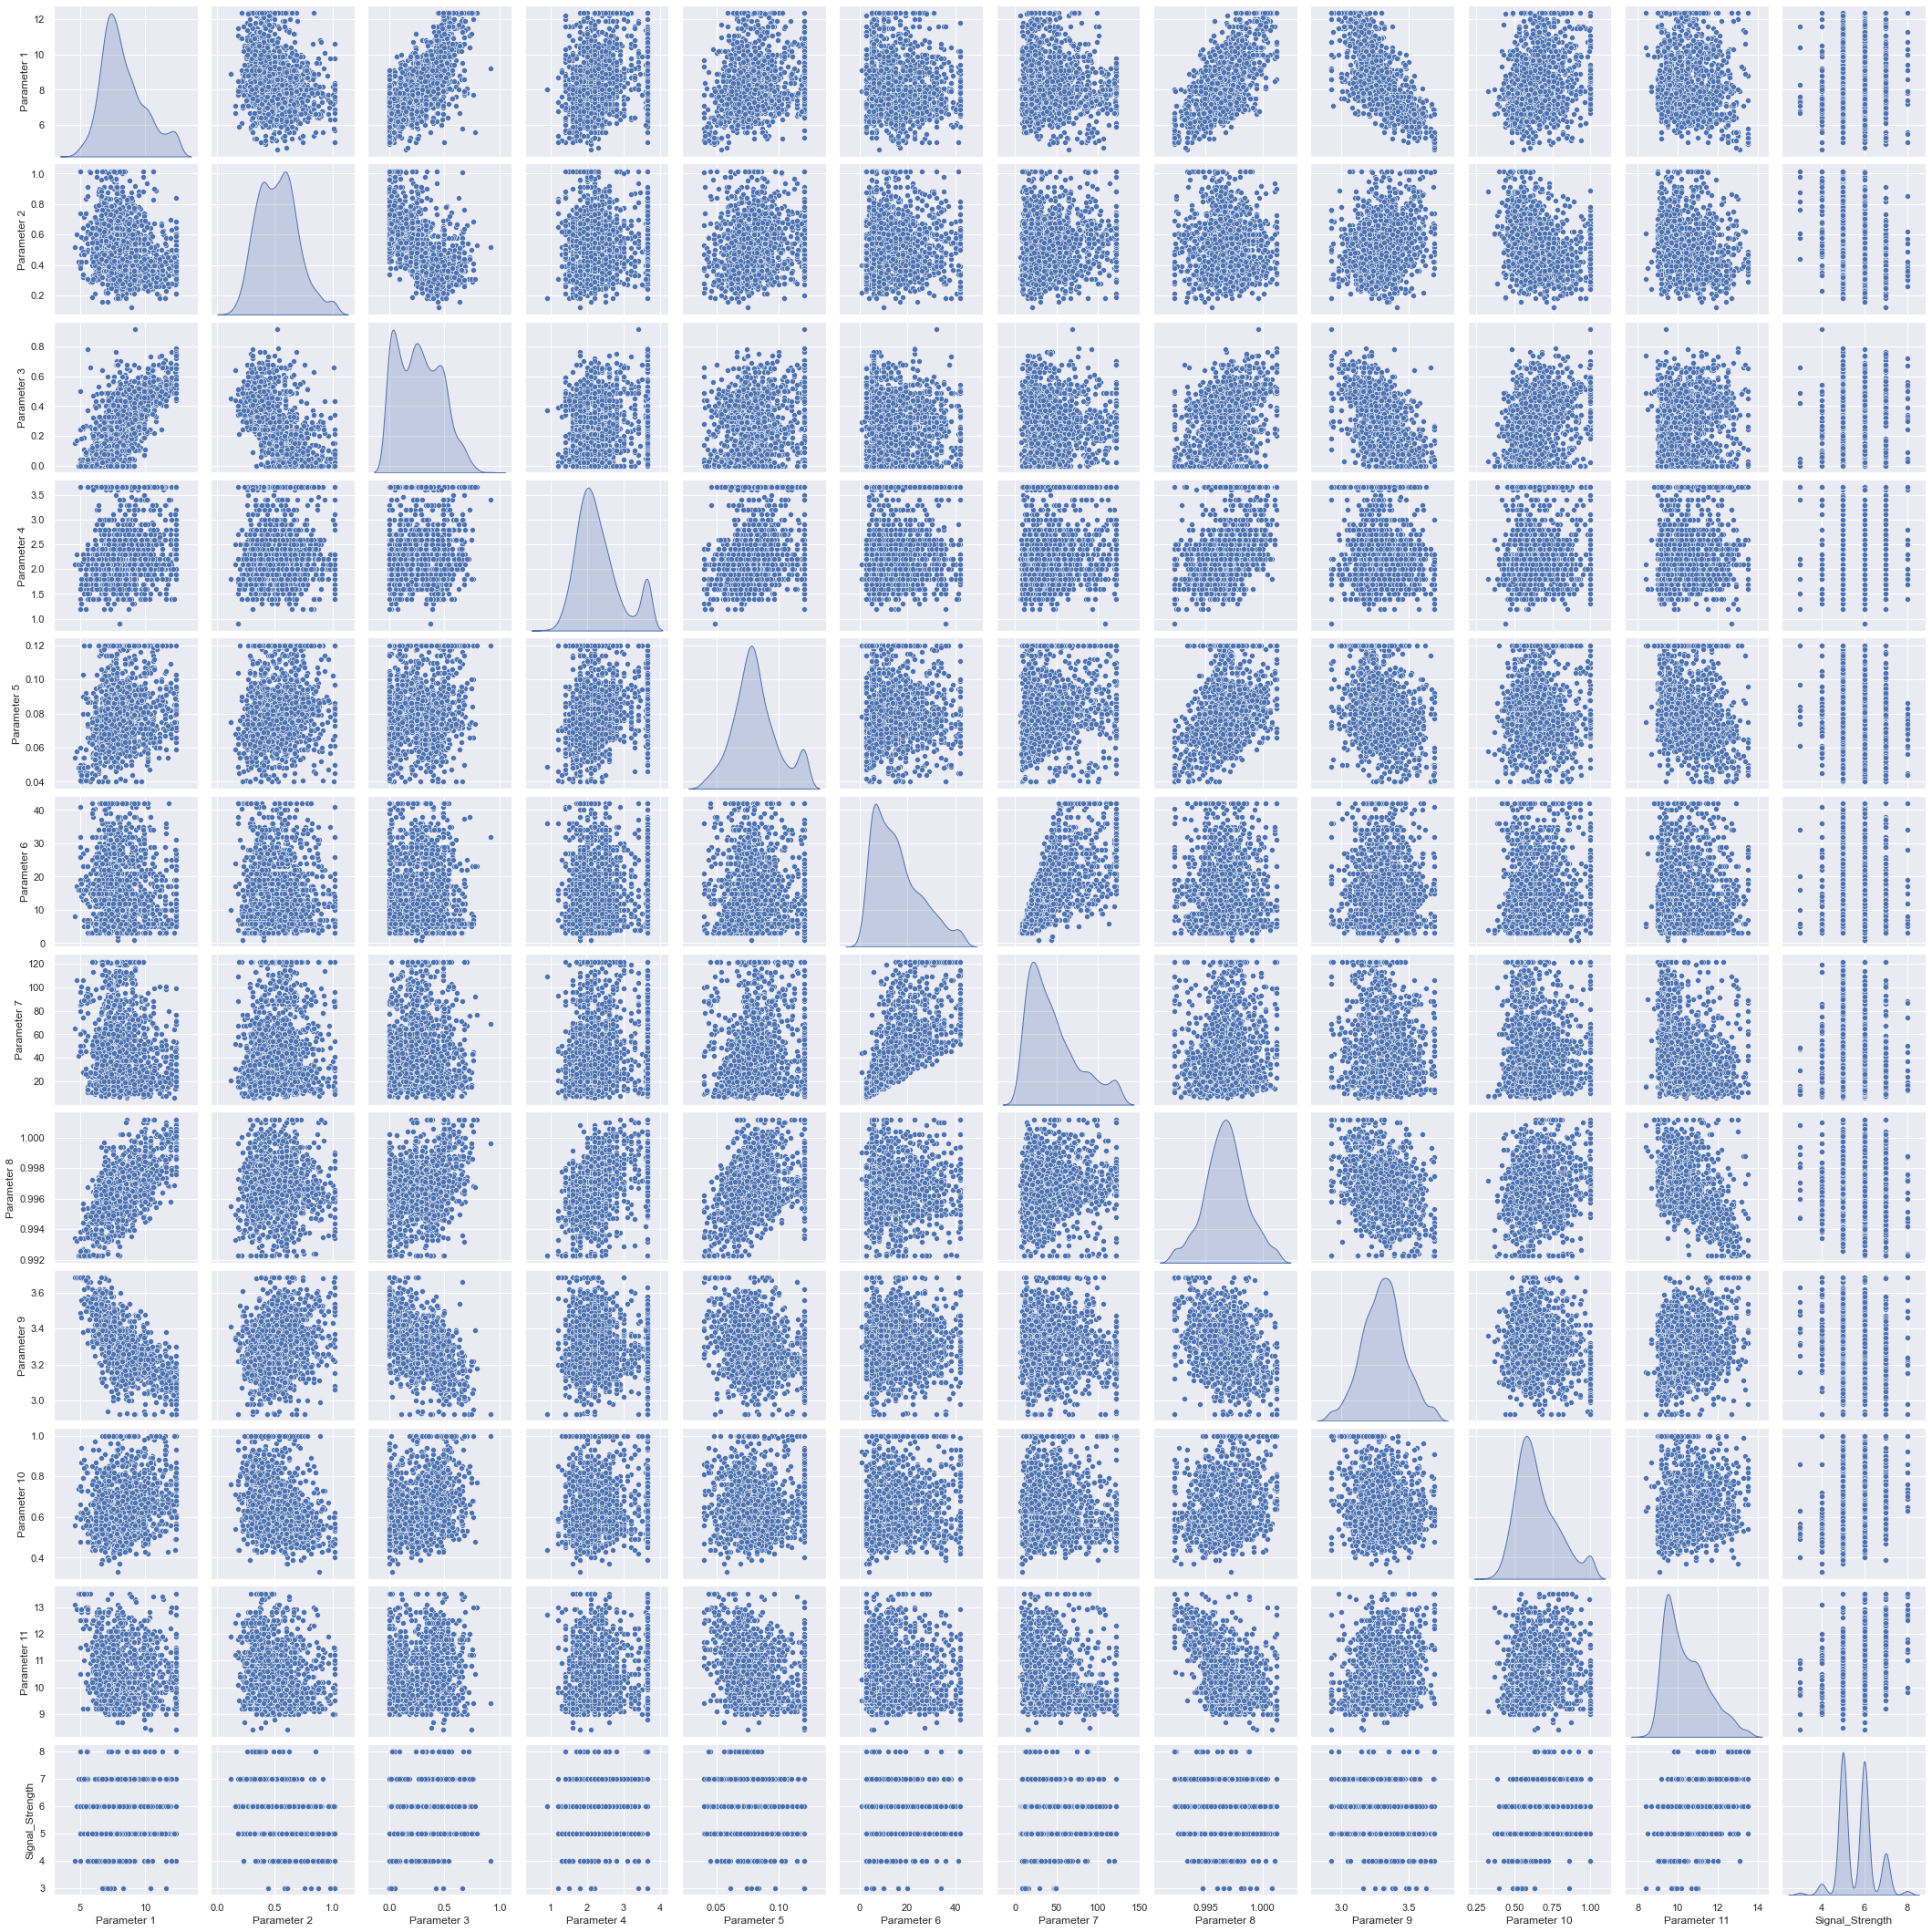

In [20]:
#Check the pair plot
sns.pairplot(sigdata, diag_kind='kde')

- **Parameter 6 and Parameter 7 are highly correlated with each other.**
- **Parameter 1 is positively correlated to Parameter 3 and Parameter 8 and negatively correlated to Parameter 2 and Parameter 9.**
- **Parameter 4 is has very low correlation with other Parameters.**

### Check the correlation Matrix

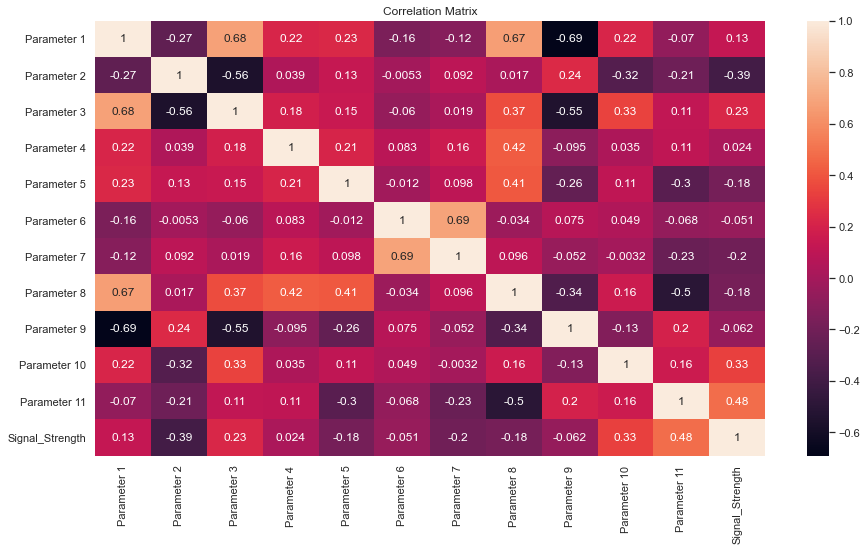

In [21]:
corr = sigdata.corr()

#plot
plt.figure(figsize=(15, 8))
plt.title('Correlation Matrix')
sns.heatmap(corr, annot = True);

- **Since, the correlation is not too high and below 0.7, So i am not dropping any features.**

## 3. Design, train, tune and test a neural network regressor. 

### Split the dataset into training, Validation and test dataset

In [22]:
#separate the independent and target variable
X = sigdata.drop('Signal_Strength', axis=1)
y = sigdata['Signal_Strength']

In [23]:
#split the data into train and test set
X_train1, X_test, y_train1, y_test = train_test_split(X, y, test_size=0.2, random_state = 7)

In [24]:
#slipt the training set into train and validation set
X_train, X_val, y_train, y_val = train_test_split(X_train1, y_train1, test_size=0.2, random_state= 7)

In [25]:
#initialize the sequncetial model
model = Sequential()

#Normalize input data
model.add(BatchNormalization(input_shape=(X_train.shape[1], )))
model.add(Dense(8, kernel_initializer='normal', activation='relu'))

## Add final Dense layer for prediction - Tensorflow.keras declares weights and bias automatically
model.add(Dense(1, kernel_initializer='normal', activation='linear')) #one output layer

In [26]:
# Compile the model - add mean squared error as loss and stochastic gradient descent as optimizer
#opt = SGD(lr=0.01)
opt = Adam(lr = 0.001)
model.compile(optimizer= opt, loss= 'mse', metrics=['mse'])

In [27]:
#Fit the model with 100 epochs
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size = 28, epochs=200)

Epoch 1/200
37/37 [==============================] - 1s 7ms/step - loss: 32.2984 - mse: 32.2984 - val_loss: 30.6168 - val_mse: 30.6168
Epoch 2/200
37/37 [==============================] - 0s 2ms/step - loss: 31.5041 - mse: 31.5041 - val_loss: 29.4288 - val_mse: 29.4288
Epoch 3/200
37/37 [==============================] - 0s 2ms/step - loss: 29.9358 - mse: 29.9358 - val_loss: 27.3842 - val_mse: 27.3842
Epoch 4/200
37/37 [==============================] - 0s 2ms/step - loss: 26.7145 - mse: 26.7145 - val_loss: 23.9315 - val_mse: 23.9315
Epoch 5/200
37/37 [==============================] - 0s 2ms/step - loss: 21.6151 - mse: 21.6151 - val_loss: 18.7996 - val_mse: 18.7996
Epoch 6/200
37/37 [==============================] - 0s 3ms/step - loss: 15.7664 - mse: 15.7664 - val_loss: 13.0039 - val_mse: 13.0039
Epoch 7/200
37/37 [==============================] - 0s 2ms/step - loss: 10.9894 - mse: 10.9894 - val_loss: 8.4238 - val_mse: 8.4238
Epoch 8/200
37/37 [==============================] - 0s 2

Epoch 63/200
37/37 [==============================] - 0s 2ms/step - loss: 0.4200 - mse: 0.4200 - val_loss: 0.5316 - val_mse: 0.5316
Epoch 64/200
37/37 [==============================] - 0s 2ms/step - loss: 0.4217 - mse: 0.4217 - val_loss: 0.5164 - val_mse: 0.5164
Epoch 65/200
37/37 [==============================] - 0s 2ms/step - loss: 0.4302 - mse: 0.4302 - val_loss: 0.5192 - val_mse: 0.5192
Epoch 66/200
37/37 [==============================] - 0s 2ms/step - loss: 0.4248 - mse: 0.4248 - val_loss: 0.5223 - val_mse: 0.5223
Epoch 67/200
37/37 [==============================] - 0s 2ms/step - loss: 0.4330 - mse: 0.4330 - val_loss: 0.5218 - val_mse: 0.5218
Epoch 68/200
37/37 [==============================] - ETA: 0s - loss: 0.4179 - mse: 0.417 - 0s 2ms/step - loss: 0.4201 - mse: 0.4201 - val_loss: 0.5260 - val_mse: 0.5260
Epoch 69/200
37/37 [==============================] - 0s 2ms/step - loss: 0.4277 - mse: 0.4277 - val_loss: 0.5112 - val_mse: 0.5112
Epoch 70/200
37/37 [==================

Epoch 186/200
37/37 [==============================] - 0s 1ms/step - loss: 0.4337 - mse: 0.4337 - val_loss: 0.5085 - val_mse: 0.5085
Epoch 187/200
37/37 [==============================] - 0s 1ms/step - loss: 0.4178 - mse: 0.4178 - val_loss: 0.5051 - val_mse: 0.5051
Epoch 188/200
37/37 [==============================] - 0s 1ms/step - loss: 0.4270 - mse: 0.4270 - val_loss: 0.5012 - val_mse: 0.5012
Epoch 189/200
37/37 [==============================] - 0s 1ms/step - loss: 0.4242 - mse: 0.4242 - val_loss: 0.5240 - val_mse: 0.5240
Epoch 190/200
37/37 [==============================] - 0s 1ms/step - loss: 0.4332 - mse: 0.4332 - val_loss: 0.5152 - val_mse: 0.5152
Epoch 191/200
37/37 [==============================] - 0s 1ms/step - loss: 0.4168 - mse: 0.4168 - val_loss: 0.5172 - val_mse: 0.5172
Epoch 192/200
37/37 [==============================] - 0s 1ms/step - loss: 0.4299 - mse: 0.4299 - val_loss: 0.5063 - val_mse: 0.5063
Epoch 193/200
37/37 [==============================] - 0s 1ms/step - 

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 11)                44        
_________________________________________________________________
dense (Dense)                (None, 8)                 96        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 9         
Total params: 149
Trainable params: 127
Non-trainable params: 22
_________________________________________________________________


In [29]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

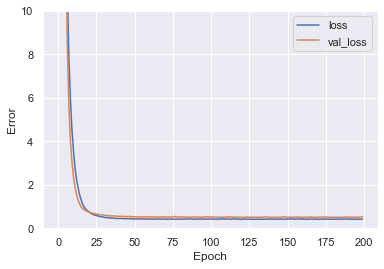

In [30]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error')
  plt.legend()
  plt.grid(True)

plot_loss(history)

- **As we can see with 15 ecphoh the error reaches to 0.39, and after that not much changes in the error.**
- **Tune the mdel with different learning rate and using SGD and Adam, as i observed SGD with learning rate 0.01 the loss is less.**

In [31]:
##Evaluate with test data
test_loss = model.evaluate(X_test, y_test)

10/10 [==============================] - 0s 1ms/step - loss: 0.3655 - mse: 0.3655


- **With test data loss is neary 0.35**

In [32]:
# save the model in h5 file. This will save in current working dir
model.save("signal_model_reg.h5") #using h5 extension
print("model saved!!!")

model saved!!!


In [33]:
# load the model
model_regr = load_model('signal_model_reg.h5')

In [34]:
#Do the prediction with test data
y_pred = model_regr.predict(X_test)
y_pred[:5]

array([[5.716699 ],
       [5.776996 ],
       [6.004248 ],
       [5.3779626],
       [5.9840856]], dtype=float32)

In [35]:
#Actual data
y_test[:5]

1526    6
674     6
1508    6
58      5
1351    6
Name: Signal_Strength, dtype: int64

- **As we can observe from the prediction and actual, the result is nearly same with minimal error.**

In [36]:
import warnings as wn
wn.filterwarnings('ignore')

## to generate test data set
from sklearn.datasets import make_blobs, make_classification

#tensorflow and keras package
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model
from tensorflow.keras.optimizers import SGD

##matplotlib
from matplotlib import pyplot
import numpy as np
import pandas as pd
import seaborn as sns
#sns.set(color_codes=True)

import plotly.express as px
from mpl_toolkits.mplot3d import Axes3D

In [37]:
#Dataset
sigdata.head()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


5    681
6    638
7    199
4     53
8     18
3     10
Name: Signal_Strength, dtype: int64


<AxesSubplot:xlabel='Signal_Strength', ylabel='count'>

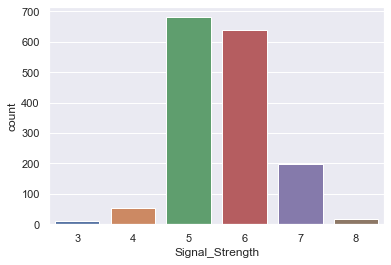

In [38]:
# counting the number of classes
print(sigdata['Signal_Strength'].value_counts(sort=False))

## Distribution of Signal_Strength
sns.countplot(sigdata['Signal_Strength'])  

- **So it looks like there are 8 different classes of "Signal_Strength".**

## 3. Design, train, tune and test a neural network classifier.. 

In [39]:
dataset = sigdata.values

In [40]:
#separate the independent and target variable
X = dataset[:, 0:11].astype(float)
y = dataset[:, 11]

In [41]:
#Use label encoder and make the signal strengh in sequence order
y = LabelEncoder().fit_transform(y)
n_class = len(np.unique(y))

In [42]:
# convert integers to dummy variables (i.e. one hot encoded)
y = to_categorical(y)

In [43]:
#split the data into train, validation and test set
X_train1, X_test, y_train1, y_test = train_test_split(X, y, test_size=0.2, random_state = seed)

#slipt the training set into train and validation set
X_train, X_val, y_train, y_val = train_test_split(X_train1, y_train1, test_size=0.2, random_state= seed)

In [44]:
#Input dimention
input_dm = X_train.shape[1]
input_dm

11

### Validate Modle 

In [45]:
##This class use to build a sigle layer acrchitecture
class NaiveModel:
    def __init__(self):
        self.model = Sequential()
        self.batchsize = 128  ##This is for mini-batch gradient descent batch size
        
    #Function for compiling the model
    def __ComplileWithSGD(self, lr=0.01, momentum = 0.65):
        opt = SGD(lr= lr,  momentum = momentum) #lr=0.1, decay=1e-6, momentum=0.9, nesterov=True
        self.model.compile(loss = 'categorical_crossentropy', optimizer=opt, metrics = ['accuracy'])
        print(self.model.summary())
         
    #This will build funnel type network: sequence of layers of reducing neurons + output layer(match to no.of classes)
    def BuildSequencial_MultiLayer_Funnel(self, inputDimensions, noOfClasses, firstLayerNeurons=50, reduceBy = 10):
        self.model.add(Dense(firstLayerNeurons, input_dim=inputDimensions, activation='relu',
                            kernel_initializer='he_uniform'))
        self.model.add(BatchNormalization())
        for neuronCounts in range(firstLayerNeurons-reduceBy, noOfClasses, -reduceBy):
            self.model.add(Dense(neuronCounts, activation='relu', kernel_initializer='he_uniform'))
        self.model.add(Dense(noOfClasses, activation='softmax'))
        self.__ComplileWithSGD()    
                   
    #fit fucniton for nerural network to train model
    # When we do model the fit, it call the gradient descent with training data x, target y and the no.of epochs mentioned
    def Fit(self, trainX, trainY, testX, testY, noOfEpochs=100, verbose_out= 0):
        self.history = self.model.fit(trainX, trainY, validation_data=(testX, testY),
                                      epochs=noOfEpochs, verbose= verbose_out, batch_size = self.batchsize)
        
        _, self.test_accuracy = self.model.evaluate(testX, testY, verbose=verbose_out)
        self.test_accuracy = round(self.test_accuracy, 3)
    
    
    ##Ploting the metics info
    def PlotFit(self):
        h1 = self.history.history
        ##print(h1)
        
        #fig size
        pyplot.figure(figsize=(20, 6))
        
        #Epochs Vs Train Accuracy
        pyplot.subplot(1, 3, 1)
        ax = sns.lineplot(y = h1['val_accuracy'], x = range(len(h1['val_accuracy'])), label = "val_acc", palette='binary')
        ax.set(xlabel='ephochs', ylabel='val_accuracy')
        ax = sns.lineplot(y = h1['accuracy'], x =  range(len(h1['val_accuracy'])), label = "accuracy", palette='flare')
        ax.set(xlabel='ephochs', ylabel='Accuracy')
        pyplot.title('Epochs Vs Train Accuracy (Acc ='+str(self.test_accuracy)+')')
        
        #Validate Vs Train Accuracy
        pyplot.subplot(1, 3, 2)
        ax = sns.lineplot(x = h1['accuracy'], y =  h1['val_accuracy'], label = "acc vs val_acc", palette='binary', color='green', sort=False)
        ax.set(xlabel='accuracy', ylabel='val accuaracy')
        pyplot.legend()
        pyplot.title('Validate Vs Train Accuracy (Acc ='+str(self.test_accuracy)+')')
        
        #Loss plot
        pyplot.subplot(1, 3, 3)
        pdtmp1 = abs(pd.DataFrame(h1['loss']) - pd.DataFrame(h1['val_loss']))
        pdtmp1.fillna(0, inplace=True)
        ax = sns.lineplot(y = pdtmp1[0], x = range(0, len(h1['val_loss']), 1), label = "Loss Convergence", color='red')
        ax.set(xlabel='ephochs', ylabel='abs(val loss - loss)')
        pyplot.legend()
        pyplot.title('Loss (Acc ='+str(self.test_accuracy)+')')
        pyplot.show()
    
###Utility function Militlayer with funnel neruron size
def NaivModelFactory_MultiLayer_Funnel(firstLayerNeurons, reduceNeuronBy, trainX, trainy, testX, testy):
    model1 = NaiveModel()
    model1.BuildSequencial_MultiLayer_Funnel(trainX.shape[1], trainy.shape[1], firstLayerNeurons, reduceNeuronBy)
    model1.Fit(trainX, trainy, testX, testy)
    model1.PlotFit()  


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 11)                132       
_________________________________________________________________
batch_normalization_1 (Batch (None, 11)                44        
_________________________________________________________________
dense_3 (Dense)              (None, 9)                 108       
_________________________________________________________________
dense_4 (Dense)              (None, 7)                 70        
_________________________________________________________________
dense_5 (Dense)              (None, 6)                 48        
Total params: 402
Trainable params: 380
Non-trainable params: 22
_________________________________________________________________
None


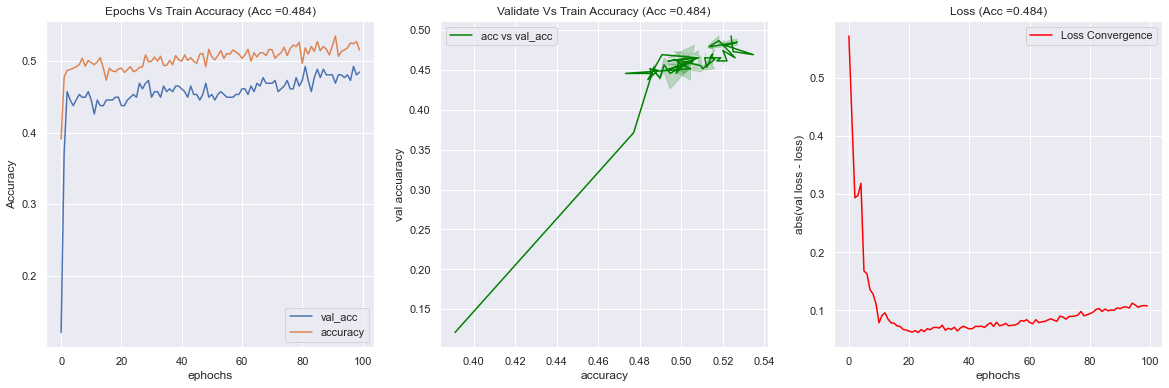

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 11)                132       
_________________________________________________________________
batch_normalization_2 (Batch (None, 11)                44        
_________________________________________________________________
dense_7 (Dense)              (None, 8)                 96        
_________________________________________________________________
dense_8 (Dense)              (None, 6)                 54        
Total params: 326
Trainable params: 304
Non-trainable params: 22
_________________________________________________________________
None


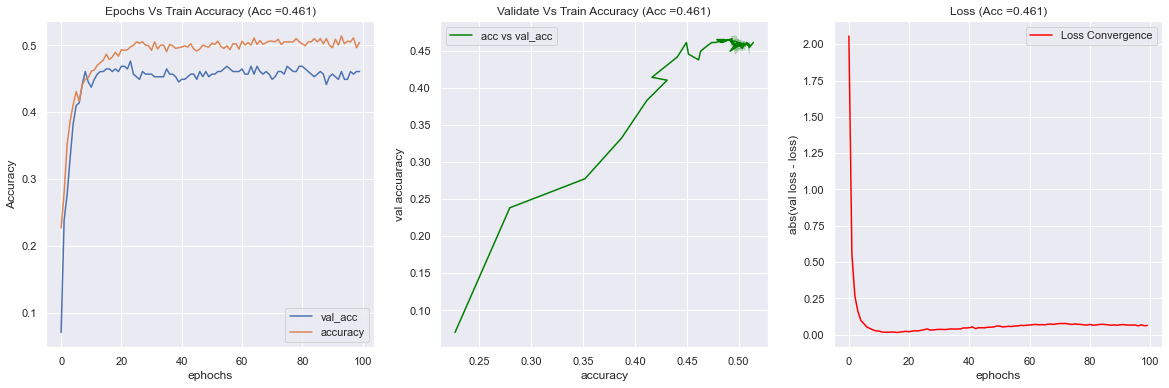

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 11)                132       
_________________________________________________________________
batch_normalization_3 (Batch (None, 11)                44        
_________________________________________________________________
dense_10 (Dense)             (None, 7)                 84        
_________________________________________________________________
dense_11 (Dense)             (None, 6)                 48        
Total params: 308
Trainable params: 286
Non-trainable params: 22
_________________________________________________________________
None


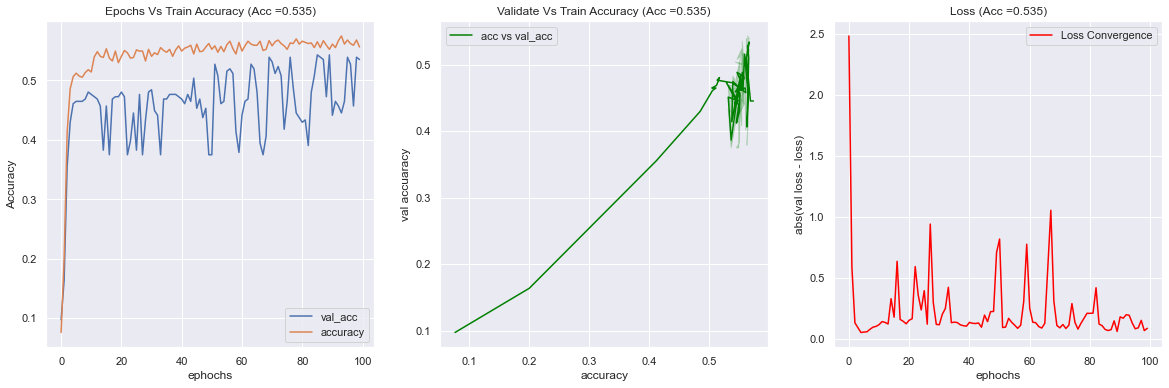

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 11)                132       
_________________________________________________________________
batch_normalization_4 (Batch (None, 11)                44        
_________________________________________________________________
dense_13 (Dense)             (None, 6)                 72        
Total params: 248
Trainable params: 226
Non-trainable params: 22
_________________________________________________________________
None


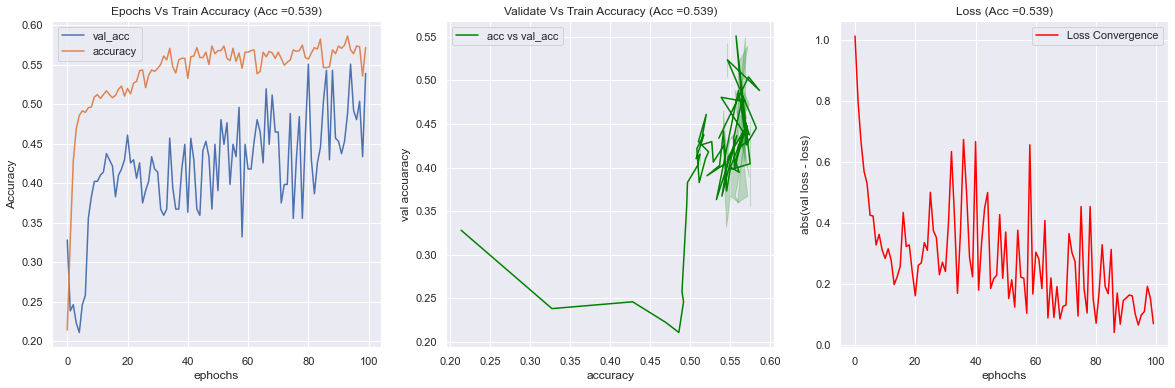

In [46]:
#NaivModelFactory_MultiLayer
if(True):
    layerbump = range(2, 6, 1)
    
    #print(neuroncounts, range(len(neuroncounts)), len(neuroncounts))
    print('')
    
    ##run loop with neuron counts
    for i in range(len(layerbump)):
        #print('Running with Multilayer bump with neuron counts: ', layerbump[i])
        NaivModelFactory_MultiLayer_Funnel(11, layerbump[i], X_train, y_train, X_val, y_val)

- **As we can observed from the validation graph, with one hidden layer of 7 neuron and using relu actication funciton and bath normalization the model accuracy corossed 50% with nealry 38 epochs.**

In [47]:
#initialize the sequncetial model
model_class = Sequential()

#add two hidden layers and one input layer
model_class.add(Dense(11, input_dim = input_dm,  activation='relu', kernel_initializer='he_normal'))
model_class.add(BatchNormalization())
model_class.add(Dense(7, activation='relu', kernel_initializer='he_normal'))
model_class.add(Dense(n_class, activation='softmax'))

In [48]:
# Compile the model
opt = SGD(lr=0.01, momentum=0.65)
model_class.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer = opt)

In [49]:
# Fit the model
model_class.fit(X_train, y_train, batch_size=128, epochs=100, validation_data=(X_val, y_val), verbose = 1)

Epoch 1/100
8/8 [==============================] - 0s 20ms/step - loss: 1.6911 - accuracy: 0.3891 - val_loss: 1.6619 - val_accuracy: 0.4766
Epoch 2/100
8/8 [==============================] - 0s 4ms/step - loss: 1.6065 - accuracy: 0.4350 - val_loss: 1.5662 - val_accuracy: 0.4805
Epoch 3/100
8/8 [==============================] - 0s 4ms/step - loss: 1.5296 - accuracy: 0.4741 - val_loss: 1.6402 - val_accuracy: 0.4883
Epoch 4/100
8/8 [==============================] - 0s 4ms/step - loss: 1.4711 - accuracy: 0.4946 - val_loss: 1.6200 - val_accuracy: 0.4805
Epoch 5/100
8/8 [==============================] - 0s 4ms/step - loss: 1.4284 - accuracy: 0.4927 - val_loss: 1.5029 - val_accuracy: 0.4883
Epoch 6/100
8/8 [==============================] - 0s 4ms/step - loss: 1.4005 - accuracy: 0.5034 - val_loss: 1.4394 - val_accuracy: 0.4805
Epoch 7/100
8/8 [==============================] - 0s 4ms/step - loss: 1.3758 - accuracy: 0.5034 - val_loss: 1.3910 - val_accuracy: 0.4844
Epoch 8/100
8/8 [=========

- **As we observed with 99 ephochs the model accuracy is nearly 57% and also the validation accuracy is nearly 55%.**

In [50]:
#Model summary
model_class.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 11)                132       
_________________________________________________________________
batch_normalization_5 (Batch (None, 11)                44        
_________________________________________________________________
dense_15 (Dense)             (None, 7)                 84        
_________________________________________________________________
dense_16 (Dense)             (None, 6)                 48        
Total params: 308
Trainable params: 286
Non-trainable params: 22
_________________________________________________________________


In [51]:
#Evaluate the model
results = model_class.evaluate(X_test, y_test)

10/10 [==============================] - 0s 2ms/step - loss: 1.0010 - accuracy: 0.6094


In [52]:
print(model_class.metrics_names)
print(results)   

['loss', 'accuracy']
[1.000976800918579, 0.609375]


- **Model accuracy is 58%**
- **Accuracy is low. We need to collect more variery of data to make the accuracy better.**

In [53]:
Y_pred_cls = model_class.predict_classes(X_test, batch_size=200, verbose=0)
Y_pred_cls

array([3, 2, 3, 3, 3, 2, 3, 3, 2, 2, 2, 3, 3, 2, 2, 3, 3, 3, 3, 2, 3, 2,
       3, 2, 2, 2, 2, 3, 2, 3, 3, 3, 3, 2, 3, 3, 2, 2, 3, 3, 2, 3, 3, 3,
       3, 2, 2, 3, 2, 3, 2, 2, 2, 3, 2, 2, 2, 2, 3, 2, 2, 3, 3, 3, 2, 3,
       2, 3, 3, 3, 3, 2, 2, 2, 2, 3, 2, 2, 2, 3, 3, 2, 3, 3, 3, 3, 2, 2,
       2, 2, 2, 2, 3, 2, 3, 3, 3, 3, 2, 2, 3, 2, 3, 3, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 3, 3, 3, 2, 3, 2, 2, 3, 3, 2, 2, 3, 3, 2, 2,
       3, 3, 3, 2, 3, 2, 3, 2, 3, 2, 2, 2, 2, 3, 3, 3, 3, 2, 3, 3, 2, 3,
       3, 3, 2, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 3,
       3, 3, 3, 2, 2, 3, 2, 3, 3, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 2, 3,
       2, 2, 2, 3, 2, 2, 2, 2, 2, 3, 3, 2, 3, 2, 2, 3, 2, 2, 2, 3, 3, 2,
       2, 3, 3, 2, 3, 3, 3, 3, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2,
       2, 2, 3, 2, 2, 2, 2, 3, 2, 3, 2, 3, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2,
       2, 2, 2, 2, 2, 3, 3, 2, 3, 3, 3, 3, 3, 2, 3, 3, 2, 3, 2, 3, 2, 2,
       2, 2, 3, 2, 3, 3, 2, 2, 2, 3, 2, 2, 2, 2, 3,

In [54]:
# save the model in h5 file. This will save in current working dir
model_class.save("signal_model_classification.h5") #using h5 extension
print("model saved!!!")

model saved!!!
